<a href="https://colab.research.google.com/github/suhasAB/store-sales-forecasting/blob/main/app/CMPE257_SalesPred_SuhasAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#/content/drive/MyDrive/sks/data

In [94]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import os

In [95]:
train_df = pd.read_csv('/content/drive/MyDrive/sks/data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/sks/data/test.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/sks/data/stores.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/sks/data/transactions.csv')
oil_df = pd.read_csv('/content/drive/MyDrive/sks/data/oil.csv')
holidays_events_df= pd.read_csv('/content/drive/MyDrive/sks/data/holidays_events.csv')

# **EDA**

In [96]:
train = pd.merge(train_df, stores_df, how='left', on='store_nbr')

In [98]:
fig.show()

In [90]:
train_avg = train[['date', 'sales', 'onpromotion']].groupby('date').mean()
train_avg = train_avg.reset_index()
fig = go.Figure(data=go.Scatter(x=train_avg['date'], 
                                y=train_avg['sales'],
                                marker_color='green', text="sales"))
fig.update_layout({"title": f'Average Sales of all 54 stores combined',
                   "xaxis": {"title":"Date"},
                   "yaxis": {"title":"Average Sales"},
                   "showlegend": False})


In [99]:
fig.show()

In [91]:
fig = px.scatter(train_avg[train_avg['onpromotion'] > 0], x="onpromotion", y="sales", color='sales', 
                           color_continuous_scale="earth",
                 size='sales', log_x=True, size_max=30)

fig.update_layout({"title": f'Correlation between OnPromotion and Sales (total avg sales and promotion on each day)',
                   "xaxis": {"title":"On Promotion"},
                   "yaxis": {"title":"Sales"},
                   "showlegend": False})


In [100]:
fig.show()

# Feature Engineering of date feature to get some more insights on the data

In [92]:
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.strftime("%B")
train['day_of_week'] = pd.to_datetime(train['date']).dt.day_name()

In [93]:
sales_by_year = train.groupby('year').mean()[['sales']]
sales_by_year = sales_by_year.reset_index()
sales_by_year['color'] =['rgb(213, 151, 012)', 'rgb(185, 019,104)', 'rgb(129,118, 116)', 'rgb(85, 256,558)', 'rgb(258,129, 135)']

sales_by_month = train.groupby('month').mean()[['sales']]
sales_by_month = sales_by_month.sort_values('sales', ascending=True)
sales_by_month['color'] = ['#babf43','#afab39','#289833','#75852c','#527226','#5f5f10','#af5f20','#4c4c19','#192943','#86160a','#431706','#920305']
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month = sales_by_month.reindex(new_order, axis=0)
sales_by_month = sales_by_month.reset_index()


sales_by_week = train.groupby('day_of_week').mean()[['sales']]
sales_by_week = sales_by_week.sort_values('sales', ascending=False)
sales_by_week['color'] = ['rgb(124, 5, 68)','rgb(204, 136, 236)','rgb(55, 171, 132)','rgb(23, 5, 119)','rgb(3, 177, 101)','rgb(0, 12, 198)','rgb(255, 214, 214)']
new_order_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_week = sales_by_week.reindex(new_order_week, axis=0)
sales_by_week = sales_by_week.reset_index()

In [15]:
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("Average Sales Every Year", "Average Sales every Month", "Average Sales Each Week "))
fig.append_trace(go.Bar(x=sales_by_year['year'], y=sales_by_year['sales'], marker = {'color': list(sales_by_year['color'])}),
                row=1, col=1)


fig.append_trace(go.Bar(x=sales_by_month['month'], y=sales_by_month['sales'], marker = {'color': list(sales_by_month['color'])}), 
                 row=2, col=1)

fig.append_trace(go.Bar(x=sales_by_week['day_of_week'], y=sales_by_week['sales'], marker = {'color': list(sales_by_week['color'])}), row=3, col=1)
fig.update_layout(height=1000, width=1000, title_text="AVERAGE SALES ANALYSIS",  
                  title_font=dict(size=30, color='#8a8d93'), showlegend=False)
fig.show()

In [16]:
holidays_events_df = holidays_events_df[(holidays_events_df['date'] >= "2013-01-01") & (holidays_events_df['date'] <= "2017-08-15")]
train_avg = train[['date', 'sales']].groupby('date').mean()
train_avg = train_avg.reset_index()
holiday_train_df = pd.merge(holidays_events_df, train_avg, on='date', how='inner')
fig = px.scatter(holiday_train_df, x="date", y="sales", size='sales', color='type',color_continuous_scale="inferno")
fig.update_layout({"title": f'Average Sales on Holidays and Events',
                   "xaxis": {"title":"Holiday/Event Date"},
                   "yaxis": {"title":"Average Sales"},
                   "showlegend": True})
fig.show()

**Price of oil on 2013-01-01 (first element of the series) is missing, let´s fill it with the value of the next day and interpolate the next ones.**

In [17]:
oil_df.loc[oil_df['date'] == '2013-01-01', 'dcoilwtico'] = 93.14
oil_df = oil_df.interpolate(method='linear', limit=20)
train_avg = train[['date', 'sales']].groupby('date').mean()
train_avg = train_avg.reset_index()
fig = go.Figure(data=go.Scatter(x=oil_df['date'], 
                                y=oil_df['dcoilwtico'],
                                marker_color='blue', text="sales"))


fig.update_layout({"title": f'Oil Prices Chart',
                   "xaxis": {"title":"Date"},
                   "yaxis": {"title":"Oil Price"},
                   "showlegend": False})
fig.show()

**Scatter plot to the see correlation between average unit sold and oil price each day**

In [18]:
oil_sales_by_date = train.groupby('date').mean()['sales']
oil_sales_by_date = oil_sales_by_date.reset_index()
oil_sales_by_date = pd.merge(oil_sales_by_date, oil_df, on ='date', how='left')
oil_sales_by_date = oil_sales_by_date.interpolate(method='linear', limit=20)
fig = px.scatter(oil_sales_by_date, x="dcoilwtico", y="sales", size='sales', color='sales',
                  color_continuous_scale="inferno")

fig.update_layout({"title": f'Oil Prices vs Average Sales ',
                   "xaxis": {"title":"Oil Price"},
                   "yaxis": {"title":"Sales"},
                   "showlegend": False})
fig.show()

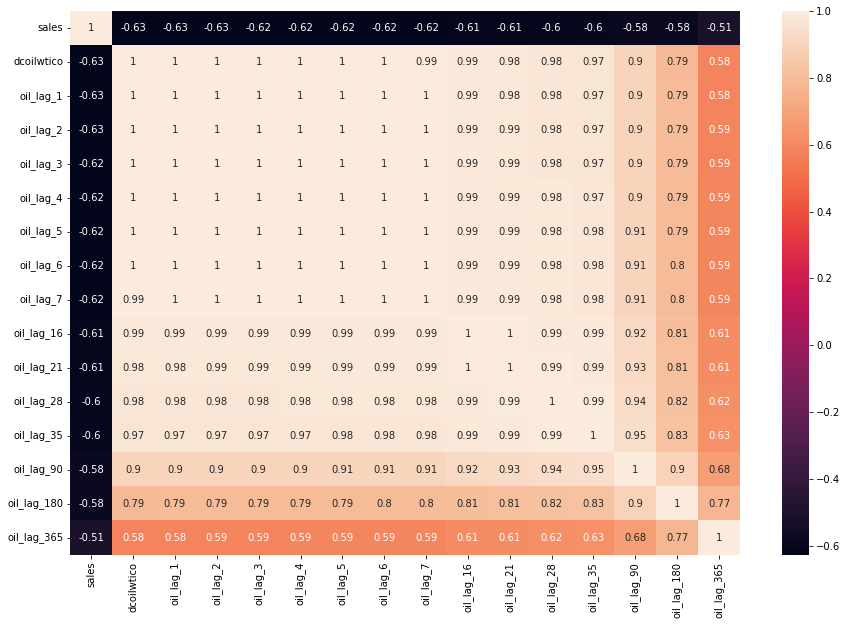

In [19]:
oil_df.loc[oil_df['date'] == '2013-01-01', 'dcoilwtico'] = 93.14
oil_df = oil_df.interpolate(method='linear')
oil_train_merged = pd.merge(train, oil_df, on='date', how='outer')
oil_train_merged = oil_train_merged.interpolate(method='ffill', limit=20000)

oil_train_merged = oil_train_merged[['date', 'dcoilwtico']].drop_duplicates().reset_index(drop=True)
LAGS_OIL = [1,2,3,4,5,6,7, 16,21,28,35, 90, 180, 365]

#compute lags for oil prices
df_lag_oil = oil_train_merged.copy()
for lag in LAGS_OIL:
    df_lag_oil[f"oil_lag_{lag}"] = df_lag_oil['dcoilwtico'].transform(lambda x: x.shift(lag))
    
oil_avg = pd.merge(train, df_lag_oil, on='date', how='left')
oil_avg = oil_avg.groupby('date').mean()[['sales', 'dcoilwtico'] + [col for col in list(oil_avg.columns) if col.startswith('oil_lag')]].reset_index()
oil_avg = oil_avg[['sales', 'dcoilwtico'] + [col for col in list(oil_avg.columns) if col.startswith('oil_lag')]]
plt.figure(figsize=(15,10))
sns.heatmap(oil_avg.corr(), annot=True)
plt.show()

**Ranking of units solds by products at each store**

In [20]:
product_family = train[['family', 'sales']].groupby('family').mean().sort_values('sales', ascending=True)
product_family = product_family.reset_index()
product_family['sales'] = product_family['sales'] 
fig = px.bar(product_family,  x='sales', y='family', color='sales', color_continuous_scale="magenta")
fig.update_layout({"title": f'Average Sales for Each Product Family',
                   "xaxis": {"title":"Average Sales"},
                   "yaxis": {"title":"Family of Product"},
                   "showlegend": True},
                    width=1000,
                    height=700)
fig.show()

**Ranking of units solds by store, taking into account all products**

In [21]:
storewise_sales = train[['store_nbr', 'sales']].groupby('store_nbr').mean().sort_values('sales', ascending=False)
storewise_sales = storewise_sales.reset_index()
storewise_sales['sales'] = storewise_sales['sales'] 
storewise_sales = pd.merge(storewise_sales, stores_df, how='left')
storewise_sales['store_nbr'] = storewise_sales['store_nbr'].astype(str)
fig = px.bar(storewise_sales, x='store_nbr', y='sales', color='type', category_orders={"store_nbr": list(storewise_sales['store_nbr']),
                             "sales": list(storewise_sales['sales'])})
fig.update_layout({"title": f'AVG SALES FOR EACH STORE NUMBER',
                   "xaxis": {"title":"STORE NUMBER"},
                   "yaxis": {"title":"Avg Unit Sold"},
                   "showlegend": True})


fig.show()

**Citywise sales in a store**

In [22]:
citywise_sales = stores_df['city'].value_counts().reset_index().rename(columns={"index":"city", "city":"num_store_per_city"}) 
store_avg = train.groupby('city').mean()[['sales', 'onpromotion']]
store_avg = store_avg.reset_index()
store_avg = pd.merge(store_avg, citywise_sales, on='city', how='left')
fig = px.scatter(store_avg, x="sales", y="onpromotion", color='city', 
                  text=store_avg['city'],
                 size='num_store_per_city', log_x=True, size_max=30)

fig.update_layout({"title": f'Avg Sales vs On Promotion for Each City. Size of bubbles is number of store in each city.',
                   "xaxis": {"title":" Avg Sales"},
                   "yaxis": {"title":"On Promotion"},
                   "height" : 600,
                   "width" : 1000,
                   "showlegend": True})
fig.show()

In [23]:
def trainTestSplit(train, num_days):
    X, y = list(), list()
    for window_start in range(len(train)):
        past_end = window_start + num_days
        future_end = past_end + num_days
        if future_end > len(train):
            break
        past, future = train[window_start:past_end,:], train[past_end:future_end,:]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [38]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.layers import Dropout, BatchNormalization, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



In [39]:
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from statsmodels.graphics.tsaplots import plot_pacf

In [40]:
train_df = pd.read_csv('/content/drive/MyDrive/sks/data/train.csv',parse_dates = ['date'], infer_datetime_format = True,
                    dtype = {'store_nbr' : 'category',
                             'family' : 'category'},
                    usecols = ['date', 'store_nbr', 'family', 'sales'])
train_df['date'] = train_df.date.dt.to_period('D')
train_df = train_df.set_index(['date', 'store_nbr', 'family']).sort_index()
test_df = pd.read_csv('/content/drive/MyDrive/sks/data/test.csv',
                   parse_dates = ['date'], infer_datetime_format = True)
test_df['date'] = test_df.date.dt.to_period('D')
test_df = test_df.set_index(['date', 'store_nbr', 'family']).sort_values('id')
calendar_df = pd.DataFrame(index = pd.date_range('2013-01-01', '2017-08-31')).to_period('D')
oil_df = pd.read_csv('/content/drive/MyDrive/sks/data/oil.csv',
                  parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date').to_period('D')
oil_df['avg_oil'] = oil_df['dcoilwtico'].rolling(7).mean()
calendar_df = calendar_df.join(oil_df.avg_oil)
calendar_df['avg_oil'].fillna(method = 'ffill', inplace = True)
calendar_df.dropna(inplace = True)

In [41]:
num_lags = 3
for l in range(1, num_lags + 1) :
    calendar_df[f'oil_lags{l}'] = calendar_df.avg_oil.shift(l)
calendar_df.dropna(inplace = True)

In [42]:
holiday_df = pd.read_csv('/content/drive/MyDrive/sks/data/holidays_events.csv',
                  parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date').to_period('D')
holiday_df = holiday_df[holiday_df.locale == 'National'] 
holiday_df = holiday_df.groupby(holiday_df.index).first() 

In [43]:
calendar_df = calendar_df.join(holiday_df) 
calendar_df['dofw'] = calendar_df.index.dayofweek 
calendar_df['wd'] = 1
calendar_df.loc[calendar_df.dofw > 4, 'wd'] = 0 
calendar_df.loc[calendar_df.type == 'Work Day', 'wd'] = 1 
calendar_df.loc[calendar_df.type == 'Transfer', 'wd'] = 0 
calendar_df.loc[calendar_df.type == 'Bridge', 'wd'] = 0 
calendar_df.loc[(calendar_df.type == 'Holiday') & (calendar_df.transferred == False), 'wd'] = 0 
calendar_df.loc[(calendar_df.type == 'Holiday') & (calendar_df.transferred == True), 'wd'] = 1 
calendar_df = pd.get_dummies(calendar_df, columns = ['dofw'], drop_first = True) 
calendar_df = pd.get_dummies(calendar_df, columns = ['type']) 
calendar_df.drop(['locale', 'locale_name', 'description', 'transferred'], axis = 1, inplace = True) 

In [44]:
start_date = '2017-04-30' 
end_date = '2017-08-15'
school_season = [] 
for i, r in calendar_df.iterrows() :
    if i.month in [4, 5, 8, 9] :
        school_season.append(1)
    else :
        school_season.append(0)
calendar_df['school_season'] = school_season

In [45]:
y_train = train_df.unstack(['store_nbr', 'family']).loc[start_date:end_date]
fourier = CalendarFourier(freq = 'W', order = 4)
dp = DeterministicProcess(index = y_train.index,
                          order = 1,
                          seasonal = False,
                          constant = False,
                          additional_terms = [fourier],
                          drop = True)
X_train = dp.in_sample()
X_train = X_train.join(calendar_df)

In [46]:
X_test = dp.out_of_sample(steps = 16) 
X_test = X_test.join(calendar_df)

Blending

In [47]:
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
linear_blending = LinearRegression(n_jobs = -1)
linear_blending.fit(X_train_scaled, y_train)
y_train_pred = pd.DataFrame(linear_blending.predict(X_train_scaled), index = X_train.index, columns = y_train.columns).clip(0.)
y_test_pred = pd.DataFrame(linear_blending.predict(X_test_scaled), index = X_test.index, columns = y_train.columns).clip(0.)

In [48]:
y_mean = y_train_pred.append(y_test_pred)
school = y_mean.loc(axis = 1)['sales', :, 'SCHOOL AND OFFICE SUPPLIES']
y_mean = y_mean.join(school.shift(1), rsuffix = 'lag1') 
X_train = X_train.loc['2017-05-01':]

In [49]:
X_train = X_train.join(y_mean)
X_test = X_test.join(y_mean)
y_train = y_train.loc['2017-05-01':]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9138: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,3 on the right)



Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators = 225, n_jobs=-1, random_state=5)
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



RandomForestRegressor(n_estimators=225, n_jobs=-1, random_state=5)

In [51]:
y_train_pred = pd.DataFrame(model_rf.predict(X_train), index=X_train.index, columns=y_train.columns)
y_train_pred = y_train_pred.stack(['store_nbr', 'family']).clip(0.)
y_pred = pd.DataFrame(model_rf.predict(X_test), index = X_test.index, columns = y_train.columns).clip(0.)
y_pred = y_pred.stack(['store_nbr', 'family'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.



Random Forest Evaluation

In [52]:
from sklearn.metrics import mean_squared_log_error
y_temp = y_train.stack(['store_nbr', 'family']).clip(0.)

y_temp['pred'] = y_train_pred.values
print("RMSLE on each family is:\n ", y_temp.groupby('family').apply(lambda r : np.sqrt(np.sqrt(mean_squared_log_error(r['sales'], r['pred'])))))
print('RMSLE on Train Data is : ', np.sqrt(np.sqrt(msle(y_temp['sales'], y_temp['pred']))))

RMSLE on each family is:
  family
AUTOMOTIVE                    0.488919
BABY CARE                     0.326960
BEAUTY                        0.491549
BEVERAGES                     0.267175
BOOKS                         0.224963
BREAD/BAKERY                  0.243035
CELEBRATION                   0.512981
CLEANING                      0.360178
DAIRY                         0.231693
DELI                          0.259403
EGGS                          0.357655
FROZEN FOODS                  0.333965
GROCERY I                     0.254531
GROCERY II                    0.535042
HARDWARE                      0.485359
HOME AND KITCHEN I            0.469918
HOME AND KITCHEN II           0.445770
HOME APPLIANCES               0.406659
HOME CARE                     0.312534
LADIESWEAR                    0.477684
LAWN AND GARDEN               0.469634
LINGERIE                      0.555581
LIQUOR,WINE,BEER              0.494035
MAGAZINES                     0.479807
MEATS                         

In [53]:
rf_rmsle = np.sqrt(np.sqrt(msle(y_temp['sales'], y_temp['pred'])))
models_list = ['Random Forest']
rmsle_list = [rf_rmsle]
submission_df = pd.read_csv('/content/drive/MyDrive/sks/data/sample_submission.csv')
submission_df['sales'] = y_pred.values
submission_df.to_csv('submission_rf.csv', index = False) 

**SVM Regressor**

In [54]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

model_svr = MultiOutputRegressor(SVR(C = 0.2, kernel = 'rbf'), n_jobs = -1)
model_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR(C=0.2), n_jobs=-1)

In [55]:
y_train_pred = pd.DataFrame(model_svr.predict(X_train), index=X_train.index, columns=y_train.columns)
y_train_pred = y_train_pred.stack(['store_nbr', 'family']).clip(0.)
y_pred = pd.DataFrame(model_svr.predict(X_test), index = X_test.index, columns = y_train.columns).clip(0.)
y_pred = y_pred.stack(['store_nbr', 'family'])

In [56]:
y_temp = y_train.stack(['store_nbr', 'family']).clip(0.)

y_temp['pred'] = y_train_pred.values
print("RMSLE on each family is:\n ", y_temp.groupby('family').apply(lambda r : np.sqrt(np.sqrt(mean_squared_log_error(r['sales'], r['pred'])))))
print('RMSLE on Train Data is : ', np.sqrt(np.sqrt(msle(y_temp['sales'], y_temp['pred']))))

RMSLE on each family is:
  family
AUTOMOTIVE                    0.723588
BABY CARE                     0.524979
BEAUTY                        0.735272
BEVERAGES                     0.535328
BOOKS                         0.385898
BREAD/BAKERY                  0.495772
CELEBRATION                   0.760611
CLEANING                      0.585194
DAIRY                         0.505336
DELI                          0.506458
EGGS                          0.634655
FROZEN FOODS                  0.627091
GROCERY I                     0.499294
GROCERY II                    0.770922
HARDWARE                      0.729110
HOME AND KITCHEN I            0.712501
HOME AND KITCHEN II           0.680101
HOME APPLIANCES               0.648445
HOME CARE                     0.550494
LADIESWEAR                    0.731044
LAWN AND GARDEN               0.718112
LINGERIE                      0.798009
LIQUOR,WINE,BEER              0.827969
MAGAZINES                     0.715891
MEATS                         

In [57]:
svr_rmsle = np.sqrt(np.sqrt(msle(y_temp['sales'], y_temp['pred'])))
models_list.append('SVM Regressor')
rmsle_list.append(svr_rmsle)
submission_df = pd.read_csv('/content/drive/MyDrive/sks/data/sample_submission.csv')
submission_df['sales'] = y_pred.values
submission_df.to_csv('submission_svr.csv', index = False) 

In [58]:
from sklearn.ensemble import VotingRegressor, ExtraTreesRegressor, BaggingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

import warnings
from joblib import Parallel, delayed

In [59]:
class votingEnsembleRegression():
    
    def __init__(self, n_jobs=-1, verbose=0):    
        self.n_jobs = n_jobs
        self.verbose = verbose
        self.estimators_ = None
    
    def estimator(self, X_train, y_train):
    
        warnings.simplefilter(action='ignore', category=FutureWarning)
        
        if y_train.name[2] == 'SCHOOL AND OFFICE SUPPLIES': 
            et_regressor = ExtraTreesRegressor(n_estimators = 225, n_jobs=-1, random_state=5)
            rf_regressor = RandomForestRegressor(n_estimators = 225, n_jobs=-1, random_state=5)
            bag_regressor1 = BaggingRegressor(base_estimator=et_regressor,n_estimators=10,n_jobs=-1,random_state=5)
            bag_regressor2 = BaggingRegressor(base_estimator=rf_regressor,n_estimators=10,n_jobs=-1,random_state=5)
            model = VotingRegressor([('regressor1', bag_regressor1), ('regressor2', bag_regressor2)])
        else:
            ridge = Ridge(fit_intercept=True, solver='auto', alpha=0.75, normalize=True, random_state=5)
            svr = SVR(C = 0.2, kernel = 'rbf')
            model = VotingRegressor([('ridge', ridge), ('svr', svr)]) 
        model.fit(X_train, y_train)

        return model
    
    def fit(self,X_train, y_train):
        self.estimators = Parallel(n_jobs=self.n_jobs, verbose=0,)(delayed(self.estimator)(X_train, y_train.iloc[:, i]) for i in range(y_train.shape[1]))
        return
    
    def predict(self, X_test):
        y_pred = Parallel(n_jobs=self.n_jobs,verbose=0)(delayed(e.predict)(X_test) for e in self.estimators)
        return np.stack(y_pred, axis=1)

In [60]:
votingEnsembleRegression_model=votingEnsembleRegression()
votingEnsembleRegression_model.fit(X_train, y_train)

In [66]:
y_train_pred = pd.DataFrame(votingEnsembleRegression_model.predict(X_train), index=X_train.index, columns=y_train.columns)
y_train_pred = y_train_pred.stack(['store_nbr', 'family']).clip(0.)
y_pred = pd.DataFrame(votingEnsembleRegression_model.predict(X_test), index = X_test.index, columns = y_train.columns).clip(0.)
y_pred = y_pred.stack(['store_nbr', 'family'])

**Evaluation**

In [67]:
y_temp = y_train.stack(['store_nbr', 'family']).clip(0.)

y_temp['pred'] = y_train_pred.values
print("RMSLE on each family is:\n ", y_temp.groupby('family').apply(lambda r : np.sqrt(np.sqrt(mean_squared_log_error(r['sales'], r['pred'])))))
print('RMSLE on Train Data is : ', np.sqrt(np.sqrt(msle(y_temp['sales'], y_temp['pred']))))

RMSLE on each family is:
  family
AUTOMOTIVE                    0.682456
BABY CARE                     0.485725
BEAUTY                        0.678844
BEVERAGES                     0.429658
BOOKS                         0.345595
BREAD/BAKERY                  0.398289
CELEBRATION                   0.706130
CLEANING                      0.508470
DAIRY                         0.393521
DELI                          0.418994
EGGS                          0.532926
FROZEN FOODS                  0.517150
GROCERY I                     0.407054
GROCERY II                    0.707978
HARDWARE                      0.685809
HOME AND KITCHEN I            0.657512
HOME AND KITCHEN II           0.630601
HOME APPLIANCES               0.589133
HOME CARE                     0.453047
LADIESWEAR                    0.656678
LAWN AND GARDEN               0.636974
LINGERIE                      0.750291
LIQUOR,WINE,BEER              0.688461
MAGAZINES                     0.673514
MEATS                         

In [69]:
vt_rmsle = np.sqrt(np.sqrt(msle(y_temp['sales'], y_temp['pred'])))
models_list.append('Voting Ensemble Regressor')
rmsle_list.append(vt_rmsle)
submission_df = pd.read_csv('/content/drive/MyDrive/sks/data/sample_submission.csv')
submission_df['sales'] = y_pred.values
submission_df.to_csv('submission_vt_regressor.csv', index = False) 

In [77]:
models_list

['Random Forest', 'SVM Regressor', 'Voting Ensemble Regressor']

**Train RMSLE obtained are as follows**

In [78]:
train_rmsle=[0.4494124359208019, 0.6792264255478004, 0.5956418338066279]

In [80]:
test_rmsle=[0.43175,0.54307,0.40419]

In [82]:
models=models_list

fig = go.Figure(data=[
    go.Bar(name='train RMSLE', x=models, y=train_rmsle),
    go.Bar(name='test RMSLE', x=models, y=test_rmsle)
])
fig.update_layout(barmode='group')
fig.show()

In [87]:
!!jupyter nbconvert CMPE257_SalesPred_SuhasAB.ipynb --to python

['[NbConvertApp] Converting notebook CMPE257_SalesPred_SuhasAB.ipynb to python',
 '[NbConvertApp] Writing 22063 bytes to CMPE257_SalesPred_SuhasAB.py']

In [88]:
!!jupyter nbconvert CMPE257_SalesPred_SuhasAB.ipynb --to html

['[NbConvertApp] Converting notebook CMPE257_SalesPred_SuhasAB.ipynb to html',
 '[NbConvertApp] Writing 925278 bytes to CMPE257_SalesPred_SuhasAB.html']